# 🏦 **German Credit Prediction** 💳

# **EXERCISE 1:**

Importing standard libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Importing libraries for our model and data preprocessing:

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report

## **Metadata:**

1. checkin_acc : Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account


2. duration : in month


3. credit_history : 
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)


4. amount


5. savings_acc : 
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account


6. present_emo_since : 
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years


7. inst_rate : installment rate in percentage of disposable income


8. personal_status :
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single


9. residing_since : permanent residence since


10. age : in years


11. inst_plans : Other installment plans
A141 : bank
A142 : stores
A143 : none


12. num_credits : Number of existing credits at this bank


13. job : A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/highly qualified employee/ officer


14. status : 
0 for good credit
1 for bad credit

Importing Data:

In [ ]:
df = pd.read_csv("German Credit Data.csv", skipinitialspace= True)
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


## **Q1 - Use  the  German  credit  rating  dataset “German Credit Data.csv”, Decision  treeclassifier to predict good or bad  credit.**

* ### Use  “sklearn.model_selection”    and  GridSearchCV  to  search  the  hyperparameter  values  and  report  the  most  optimal one.

* ### Configure the grid search to search for optimal parameters:

In [ ]:
#Checking for null values - there are none
df.isna().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [ ]:
# Defining the independent (x) and dependent (y) variables. We want to predict status, so status is our y variable.
x = df.drop(['status'], axis = 1)
y = df['status']

In [ ]:
# Defining the numeric and categorical columns for preprocessing
num_cols = df[['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits']]
cat_cols = df[['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since', 'personal_status', 'inst_plans', 'job', 'status']]

In [ ]:
# Encode the categorical variables in x. 
# Encoding transoforms categorical values into numeric values that can be plugged into the ML model
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x = x.apply(LE.fit_transform)

### • Splitting criteria: gini or entropy.
### • Maximum depth of decision tree ranges from 2 to 10.

In [ ]:
#Splitting the data in to testing and training sets. 20% of the data will be used for testing and 80% of it for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#importing needed libraries for gridsearch and decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Defining the parameters for GridSearchCV to search/explore to find the best hyperparameters.
DTC_param = { 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
             "criterion": ["gini", "entropy"]}

# Creating an instance of DecisionTreeClassifier for GridSearchCV
DTC = DecisionTreeClassifier(random_state=42)
grid_log_reg = GridSearchCV(estimator = DTC, param_grid= DTC_param, cv = 10, verbose = True)

#Fitting the x and y training sets according to the hyperparameters found by GridSearchCV
grid_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [ ]:
# Creating an instance of the DecisionTreeClassifier for prediction

DTC_final = DecisionTreeClassifier(criterion='entropy',
                       max_depth=5, max_features='auto', 
                       min_samples_leaf=1, min_samples_split=2,
                       random_state=1024, splitter='best')

DTC_final.fit(x_train, y_train)

predicted_y = DTC_final.predict(x_test)

In [ ]:
# Checking the performance of DecisionTreeClassifier when the model has different values for maximum depth (the required range from 2 - 10)

train_accuracy = []
test_accuracy = []
for i in range(2,10):
    dtc_iterate = DecisionTreeClassifier(max_depth=i , random_state=42)
    dtc_iterate.fit(x_train, y_train)
    train_accuracy.append(dtc_iterate.score(x_train, y_train))
    test_accuracy.append(dtc_iterate.score(x_test, y_test))
    
# Displaying the results as a dataframe

given_range = pd.DataFrame({'max_depth':range(2,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
given_range

,max_depth,train_acc,test_acc
0,2,0.72750,0.745
1,3,0.76125,0.765
2,4,0.78000,0.745
3,5,0.80250,0.735
4,6,0.82625,0.680
5,7,0.85500,0.690
6,8,0.88375,0.710
7,9,0.91125,0.680


* While both training and testing accuracy must be observed, testing accuracy is of greater importance. 
* As seen above, testing accuracy tends to decrease as the maximum depth increases
* But training accuracy tends to increase as the maximum depth increases.

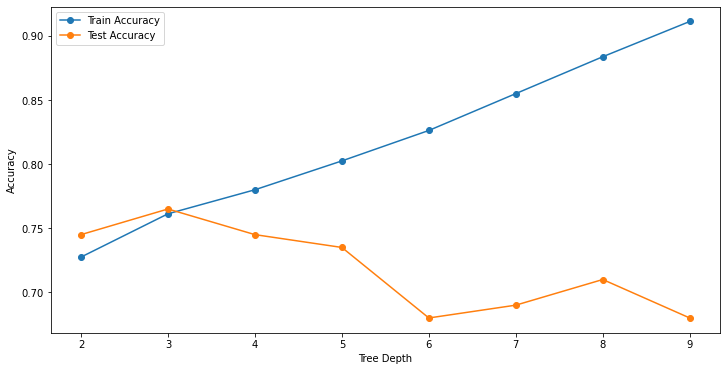

In [ ]:
# Illustrating the results above: 

plt.figure(figsize=(12,6))
plt.plot(given_range['max_depth'], given_range['train_acc'] , marker='o')
plt.plot(given_range['max_depth'], given_range['test_acc'] , marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(["Train Accuracy", "Test Accuracy"])

In [ ]:
# Displaying the best hyperparameters as found by GridSearchCV:

print('Best Criterion:', grid_log_reg.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_log_reg.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 3


### The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.

In [ ]:
# Validating the optimal parameters using 10-fold cross validation:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

validate = cross_val_predict(DTC_final, x_test, y_test, cv=10, method='predict_proba')

In [ ]:
# Displaying the ROC score:
print (roc_auc_score(y_test, validate[:, 1]))

0.6727972112032696


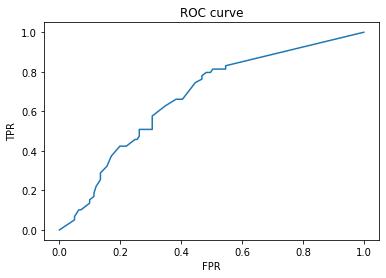

In [ ]:
# Illustrating the ROC curve:

fpr, tpr, _ = roc_curve(y_test, validate[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# The ROC curve above demonstrates a moderately well performing decision tree model. 
# This is confirmed by the curve moving further away from the upper left corner, and having a lesser area under the curve than a completely diagnoal line.

# Q2 - Visualize the treeusinggraphviz software.

In [ ]:
from graphviz import *

In [ ]:
from sklearn import tree

In [ ]:
# Saving the decision tree into a .dot file

tree.export_graphviz(DTC_final,
                     out_file="treefinal.dot",
                     feature_names = x.columns, 
                     filled = True)

* There were problems visualizing the software in this notebook itself so the visualization of the tree was done 
* using an online convertor (link given below) that was provided in an article on the TowardsDataScience website
* Source: https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
* Convertor: https://dreampuf.github.io/GraphvizOnline

## **Q3 -  Display the text representation of the rules learnt.**

In [ ]:
text_representation = tree.export_text(DTC_final)
print(text_representation)

|--- feature_5 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_3 <= 873.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- feature_9 <= 7.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  7.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  1.50
|   |   |   |   |--- feature_9 <= 46.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  46.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  873.50
|   |   |   |--- feature_6 <= 2.50
|   |   |   |   |--- feature_1 <= 22.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  22.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_6 <= 2.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2.00
|   |   |   |   |--- feature_3 <= 349.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  349.5